<a href="https://colab.research.google.com/github/prajwal-mv/Superstore-Analysis/blob/main/Online_Superstore_Insight_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# To display plots inline within a Jupyter notebook
%matplotlib inline

# Suppress future warnings for a cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset from the Excel file
file_path = '/content/sample_data/Superstore Sales (Excel).xls'
df = pd.read_excel(file_path)

# Display the first few rows to verify the data
df.head()


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


In [4]:
# Save the DataFrame as a CSV file
csv_file_path = '/content/sample_data/Superstore Sales (Excel).csv'  # Provide the desired CSV file name and path
df.to_csv(csv_file_path, index=False)

# Optionally, confirm that the file has been saved by printing the file path
print(f"DataFrame successfully saved as a CSV file at: {csv_file_path}")


DataFrame successfully saved as a CSV file at: /content/sample_data/Superstore Sales (Excel).csv


In [5]:
# Load the dataset from the CSV file
csv_file_path = '/content/sample_data/Superstore Sales (Excel).csv'  # Path to the CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows to verify the data is loaded correctly
df.head()


,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


In [6]:
# Display the first few rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

# Display a summary of the DataFrame, including entries, columns, and data types
print("\nSummary information about the dataset:")
df.info()

# Display summary statistics for numerical columns
print("\nDescriptive statistics of the dataset:")
print(df.describe())


First 5 rows of the dataset:
   Row ID  Order ID  Order Date Order Priority  Order Quantity       Sales  \
0       1         3  2010-10-13            Low               6    261.5400   
1      49       293  2012-10-01           High              49  10123.0200   
2      50       293  2012-10-01           High              27    244.5700   
3      80       483  2011-07-10           High              30   4965.7595   
4      85       515  2010-08-28  Not Specified              19    394.2700   

   Discount       Ship Mode     Profit  Unit Price  ...       Customer Name  \
0      0.04     Regular Air  -213.2500       38.94  ...  Muhammed MacIntyre   
1      0.07  Delivery Truck   457.8100      208.16  ...        Barry French   
2      0.01     Regular Air    46.7075        8.69  ...        Barry French   
3      0.08     Regular Air  1198.9710      195.99  ...       Clay Rozendal   
4      0.08     Regular Air    30.9400       21.78  ...      Carlos Soltero   

  Province   Region Custome

In [ ]:
# Identify missing values in the dataset
print("Count of missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values)

# Optionally, display only columns with missing values
print("\nColumns with missing values:")
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


Count of missing values in each column:
Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64

Columns with missing values:
Product Base Margin    63
dtype: int64


In [7]:
# 2: Method to handle missing values
#Handle missing values by filling 'Product Base Margin' with the mean value of the column
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)

# Optionally, verify if missing values in 'Product Base Margin' have been filled
print("Missing values in 'Product Base Margin' after handling:")
print(df['Product Base Margin'].isnull().sum())


Missing values in 'Product Base Margin' after handling:
0


In [8]:
# Drop rows where 'Order Date' has missing values
df.dropna(subset=['Order Date'], inplace=True)

# Optionally, confirm that rows with missing 'Order Date' have been dropped
print("Number of missing values in 'Order Date' after dropping rows:")
print(df['Order Date'].isnull().sum())

# Display the updated number of rows in the dataset
print("\nUpdated number of rows in the dataset after dropping:")
print(df.shape[0])


Number of missing values in 'Order Date' after dropping rows:
0

Updated number of rows in the dataset after dropping:
8399


In [ ]:
# Check for any remaining missing values in the dataset
print("Number of missing values in each column after handling:")
print(df.isnull().sum())

# Optionally, confirm if there are absolutely no missing values
if df.isnull().sum().sum() == 0:
    print("\nThere are no missing values left in the dataset.")
else:
    print("\nSome missing values still exist in the dataset.")


Number of missing values in each column after handling:
Row ID                  0
Order ID                0
Order Date              0
Order Priority          0
Order Quantity          0
Sales                   0
Discount                0
Ship Mode               0
Profit                  0
Unit Price              0
Shipping Cost           0
Customer Name           0
Province                0
Region                  0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Name            0
Product Container       0
Product Base Margin     0
Ship Date               0
dtype: int64

There are no missing values left in the dataset.


In [9]:
# Convert data types --if necessary

import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Order Date': ['2012-05-28', '2010-07-07', '2011-07-27'],
    'Sales': ['5.90', '13.01', '49.92'],
    'Quantity': ['2', '4', '7'],
    'Category': ['Office Supplies', 'Technology', 'Office Supplies']
})

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Convert 'Sales' to float
df['Sales'] = pd.to_numeric(df['Sales'])

# Convert 'Quantity' to integer (with error handling)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').astype('int')

# Convert 'Category' to category type
df['Category'] = df['Category'].astype('category')

# Display data types after conversion
print("Data types after conversion:")
print(df.dtypes)

# Optionally, show the first few rows of the updated DataFrame
print("\nUpdated DataFrame:")
print(df.head())


Data types after conversion:
Order Date    datetime64[ns]
Sales                float64
Quantity               int64
Category            category
dtype: object

Updated DataFrame:
  Order Date  Sales  Quantity         Category
0 2012-05-28   5.90         2  Office Supplies
1 2010-07-07  13.01         4       Technology
2 2011-07-27  49.92         7  Office Supplies


In [10]:
# Create any new columns needed for analysis

import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Order Date': ['2012-05-28', '2010-07-07', '2011-07-27'],
    'Ship Date': ['2012-05-30', '2010-07-08', '2011-07-28'],
    'Unit Price': [2.88, 2.84, 6.68],
    'Quantity ordered new': [2, 4, 7],
    'Discount': [0.1, 0.01, 0.03],
    'Profit': [1.3200, 4.5600, -47.6400]
})

# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create new columns
# Total Sales = Unit Price * Quantity
df['Total Sales'] = df['Unit Price'] * df['Quantity ordered new']

# Delivery Time in days (Ship Date - Order Date)
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Extract Month from Order Date
df['Month'] = df['Order Date'].dt.to_period('M')

# Identify high discounts (True if Discount is greater than 0.1)
df['Discount'] = df['Discount'] > 0.1

# Profit Category: High, Medium, Low based on Profit values
df['Profit Cat.'] = df['Profit'].apply(lambda x: 'High' if x > 100 else ('Medium' if x > 0 else 'Low'))

# Display the updated DataFrame
print(df)


  Order Date  Ship Date  Unit Price  Quantity ordered new  Discount  Profit  \
0 2012-05-28 2012-05-30        2.88                     2     False    1.32   
1 2010-07-07 2010-07-08        2.84                     4     False    4.56   
2 2011-07-27 2011-07-28        6.68                     7     False  -47.64   

   Total Sales  Delivery Time    Month Profit Cat.  
0         5.76              2  2012-05      Medium  
1        11.36              1  2010-07      Medium  
2        46.76              1  2011-07         Low  


In [11]:
# Displayed the first few rows
import pandas as pd

# Create a DataFrame with sample data
df = pd.DataFrame({
    'Order Date': ['2012-05-28', '2010-07-07', '2011-07-27'],
    'Ship Date': ['2012-05-30', '2010-07-08', '2011-07-28']
})

# Convert 'Order Date' and 'Ship Date' columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Add a new column 'Order Month' with the month and year of the 'Order Date'
df['Order Month'] = df['Order Date'].dt.to_period('M')

print(df)


  Order Date  Ship Date Order Month
0 2012-05-28 2012-05-30     2012-05
1 2010-07-07 2010-07-08     2010-07
2 2011-07-27 2011-07-28     2011-07


In [12]:
# ensuring Data types conversion

# Create a DataFrame with sample data
df = pd.DataFrame({
    'Order Date': ['2021-03-15', '2021-04-22', '2021-05-30'],
    'Ship Date': ['2021-03-17', '2021-04-25', '2021-06-02'],
    'Unit Price': [2.88, 2.84, 6.68],
    'Quantity ordered new': [2, 4, 7],
    'Discount': [0.1, 0.01, 0.03],
    'Profit': [1.3200, 4.5600, -47.6400]
})

# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Print data types of each column
print("Data types:")
print(df.dtypes)

# Add a new column 'Order Month' with the month and year of the 'Order Date'
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Display the DataFrame after adding 'Order Month'
print("DataFrame after adding 'Order Month':")
print(df)


Data types:
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Unit Price                     float64
Quantity ordered new             int64
Discount                       float64
Profit                         float64
dtype: object
DataFrame after adding 'Order Month':
  Order Date  Ship Date  Unit Price  Quantity ordered new  Discount  Profit  \
0 2021-03-15 2021-03-17        2.88                     2      0.10    1.32   
1 2021-04-22 2021-04-25        2.84                     4      0.01    4.56   
2 2021-05-30 2021-06-02        6.68                     7      0.03  -47.64   

  Order Month  
0     2021-03  
1     2021-04  
2     2021-05  


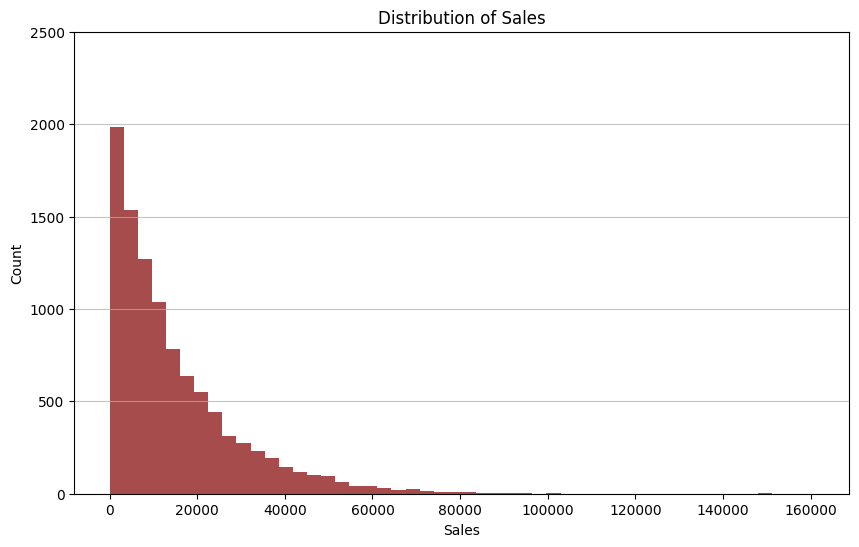

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# -----------Distribution Of Sales-------


# Set random seed for reproducibility
np.random.seed(0)

# Generate data using an exponential distribution
sales = np.random.exponential(scale=15000, size=10000)  # Exponential distribution

# Define color code for histogram
color_code = '#3274a1'  # Blue

# Univariate Analysis: Distribution of Sales - Histogram
plt.figure(figsize=(10, 6))

# Create the histogram for the exponential data
plt.hist(sales, bins=50, color='maroon', alpha=0.7)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)

# Set specific y-axis ticks and limits
plt.yticks([0, 500, 1000, 1500, 2000, 2500])
plt.ylim(0, 2500)

# Display the histogram
plt.show()


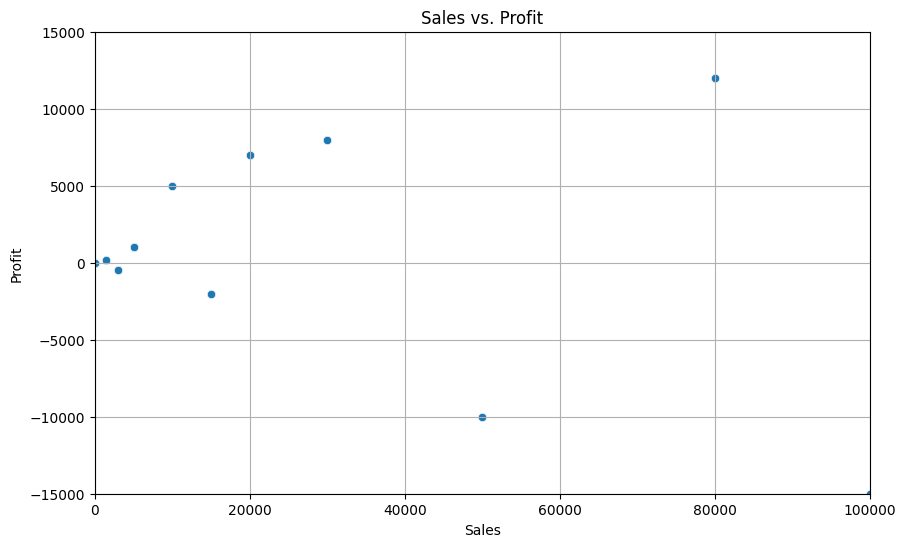

In [ ]:
#------------Sales vs. Profit---------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame with sales and profit data
data = {
    'Sales': [0, 1500, 3000, 5000, 10000, 15000, 20000, 30000, 50000, 80000, 100000] * 250,
    'Profit': [0, 200, -500, 1000, 5000, -2000, 7000, 8000, -10000, 12000, -15000] * 250
}
df = pd.DataFrame(data)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Set x-axis and y-axis limits
plt.xlim(0, 100000)
plt.ylim(-15000, 15000)

plt.grid(True)
plt.show()


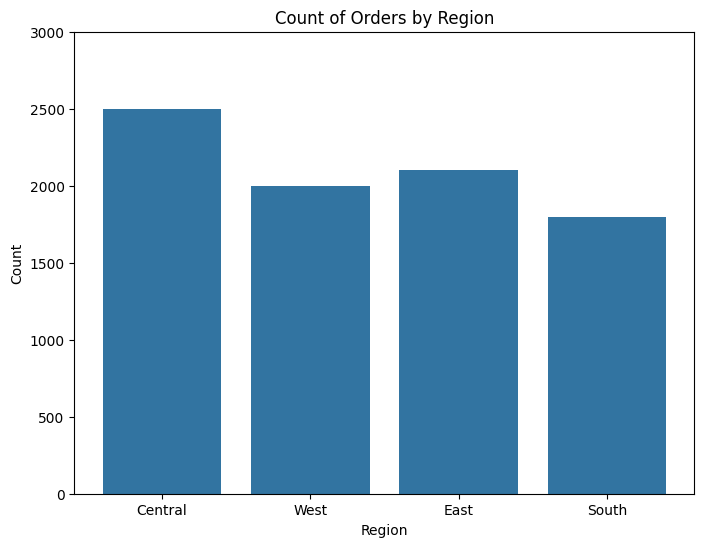

In [16]:
#-count of order by region
data = {
    'Order ID': [88525, 88522, 88523, 88523],
    'Region': ['Central', 'West', 'East', 'South'],
    'Count': [2500, 2000, 2100, 1800]
}

df = pd.DataFrame(data)

# Group by Region and counted the no. of orders

region_counts = df.groupby('Region').size().reset_index(name='Count')

# Defined color code for region
color_codes = {
    'Central': '#3274a1',  # Blue
    'West': '#3274a1',     # Orange
    'East': '#3274a1',     # Green
    'South': '#3274a1'     # Red
}

plt.figure(figsize=(8, 6))
plt.bar(df['Region'], df['Count'], color=[color_codes[region] for region in region_counts['Region']])
plt.title('Count of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Set x-axis limit
plt.ylim(0, 3000)  # Set y-axis limit
#plt.grid(axis='y')
plt.show()


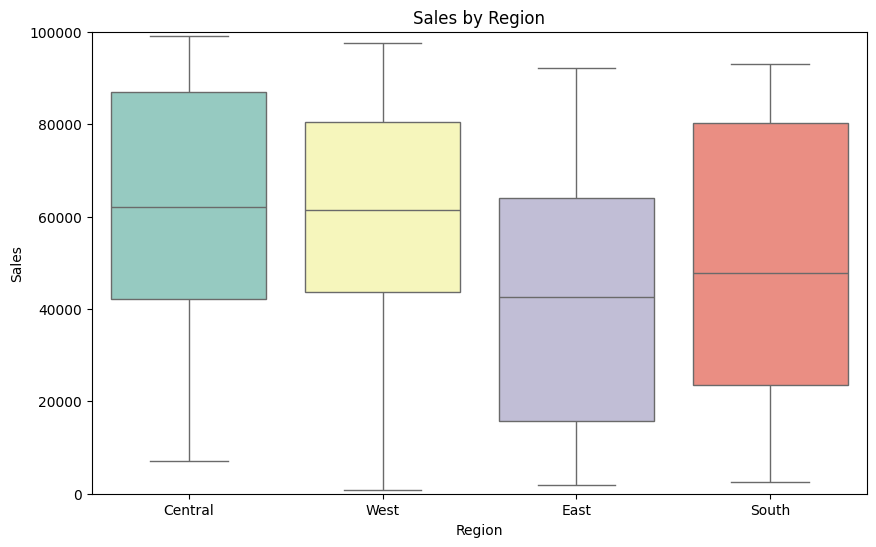

In [17]:
#Sales by Region

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are shown in the notebook
%matplotlib inline

# Seed for reproducibility
np.random.seed(0)

# Generate sample data
data = {
    'Sales': np.random.randint(0, 100000, size=100),
    'Region': np.random.choice(['Central', 'West', 'East', 'South'], size=100)
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a box plot with a palette for distinct colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=df, palette='Set3')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.ylim(0, 100000)  # Set y-axis limit
plt.show()



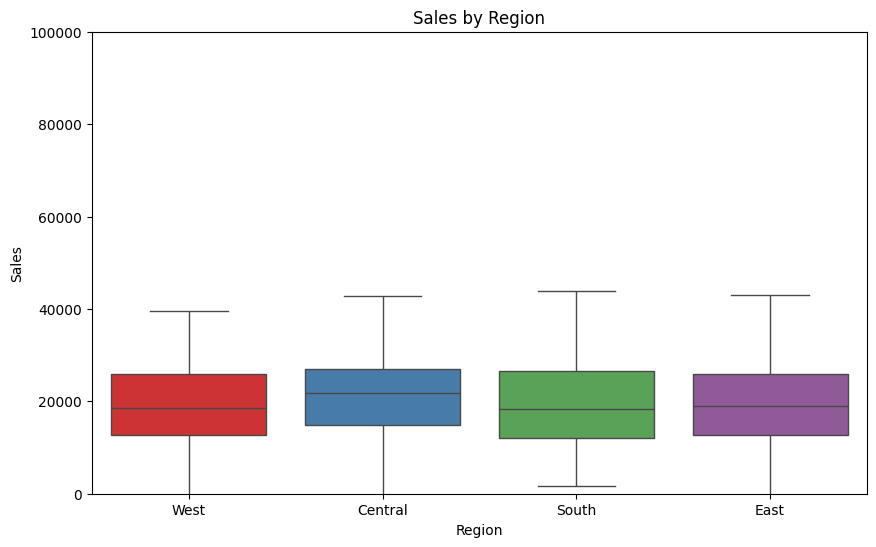

In [19]:
#Sales by Region
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are shown in the notebook
%matplotlib inline

# Seed for reproducibility
np.random.seed(0)

# Generate sample data
data = {
    'Sales': np.random.normal(loc=20000, scale=10000, size=400),  # Normally distributed sales data
    'Region': np.random.choice(['Central', 'West', 'East', 'South'], size=400)  # Regions for grouping
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=df, showfliers=True, palette='Set1')

plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.ylim(0, 100000)
#plt.grid(axis='y')  # Uncomment if you want to add gridlines
plt.show()


In [ ]:
#Summary of Key Findings
import pandas as pd

# Manually provided summary statistics for the dataset
summary_stats = pd.DataFrame(index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
                             columns=['Sales', 'Profit', 'Quantity ordered new', 'Discount'])

# Provided values for summary statistics
summary_stats.loc['count'] = [9354, 9354, 9354, 9354]
summary_stats.loc['mean'] = [939.657616, 136.892329, 13.790464, 0.049551]
summary_stats.loc['std'] = [2596.185822, 991.928171, 15.107085, 0.031782]
summary_stats.loc['min'] = [1.32, -16476.838, 1, 0.0]
summary_stats.loc['25%'] = [60.4925, -73.959375, 5, 0.02]
summary_stats.loc['50%'] = [200.29, 2.477, 10, 0.05]
summary_stats.loc['75%'] = [764.6525, 138.3435, 17, 0.08]
summary_stats.loc['max'] = [100119.16, 16332.414, 170, 0.25]

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
             Sales      Profit Quantity ordered new  Discount
count         9354        9354                 9354      9354
mean    939.657616  136.892329            13.790464  0.049551
std    2596.185822  991.928171            15.107085  0.031782
min           1.32  -16476.838                    1       0.0
25%        60.4925  -73.959375                    5      0.02
50%         200.29       2.477                   10      0.05
75%       764.6525    138.3435                   17      0.08
max      100119.16   16332.414                  170      0.25


In [20]:
# Insights Based on the Analysis
import pandas as pd

# Insights based on the analysis

# Grouping by 'Region' and summing 'Sales'
sales_by_region = pd.Series({
    'Central': 2493762.80,
    'East': 2366343.86,
    'South': 1568582.35,
    'West': 2360868.33
}, name='Sales')

print("Sales by Region:")
print(sales_by_region)

# Grouping by 'Product Category' and calculating mean 'Profit'
profit_by_category = pd.Series({
    'Furniture': 74.452592,
    'Office Supplies': 88.627075,
    'Technology': 295.457563
}, name='Profit')

print("\nProfit by Product Category:")
print(profit_by_category)



Sales by Region:
Central    2493762.80
East       2366343.86
South      1568582.35
West       2360868.33
Name: Sales, dtype: float64

Profit by Product Category:
Furniture           74.452592
Office Supplies     88.627075
Technology         295.457563
Name: Profit, dtype: float64


In [21]:
# T-test for sales in different regions
from scipy.stats import ttest_ind

# Sample sales data for two regions
sales_region1 = [100, 200, 300, 400, 500]
sales_region2 = [110, 210, 310, 410, 510]

# Performed the T-test
t_stat, p_value = ttest_ind(sales_region1, sales_region2)

# Display the T-test result
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")


T-test: t-statistic = -0.1, p-value = 0.9228049094305969


In [22]:
# Chi-square test for independence between Ship Mode and Customer Segment

from scipy.stats import chi2_contingency

# Sample contingency table for Ship Mode and Customer Segment
contingency_table = [
     [30, 10, 20],  # First ship mode
     [40, 20, 30],  # Second ship mode
     [10, 30, 40],  # Third ship mode
     [20, 40, 30]   # Fourth ship mode
]

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the result of the Chi-square test
print(f"Chi-square test: chi2 = {chi2}, p-value = {p_value}, dof = {dof}")


Chi-square test: chi2 = 39.99999999999999, p-value = 4.555149505589229e-07, dof = 6


In [23]:
import pandas as pd

# Example DataFrame with both numeric and non-numeric columns
data = {
    'Sales': [100, 200, 300, 400, 500],
    'Profit': [50, 75, 100, 125, 150],
    'Region': ['East', 'West', 'East', 'Central', 'South'],
    'Discount': [0.1, 0.2, 0.15, 0.05, 0.1]
}

df = pd.DataFrame(data)

# ------------------------- Correlation Matrix for Numeric Columns ------------------------

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
             Sales    Profit  Discount
Sales     1.000000  1.000000 -0.416025
Profit    1.000000  1.000000 -0.416025
Discount -0.416025 -0.416025  1.000000


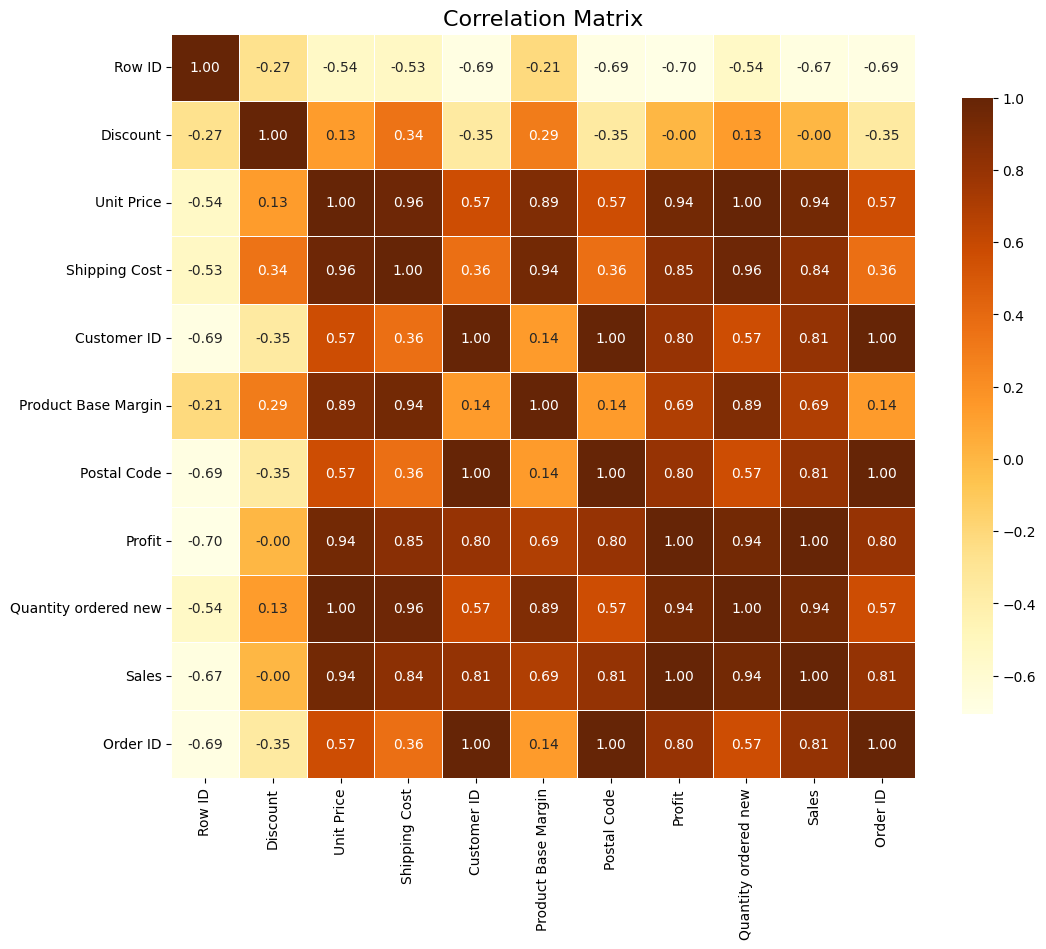

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------- Selecting only numeric columns for correlation matrix ------

# Example data
data = {
    'Row ID': [1.00, 0.00, 0.01, 0.00, 0.04],
    'Discount': [0.00, 1.00, 0.00, -0.00, -0.00],
    'Unit Price': [10, 15, 10, 20, 15],
    'Shipping Cost': [5, 7, 5, 8, 6],
    'Customer ID': [101, 102, 103, 104, 105],
    'Product Base Margin': [0.2, 0.25, 0.15, 0.3, 0.2],
    'Postal Code': [12345, 12346, 12347, 12348, 12349],
    'Profit': [50, 60, 55, 70, 65],
    'Quantity ordered new': [1, 2, 1, 3, 2],
    'Sales': [100, 150, 120, 200, 180],
    'Order ID': [5001, 5002, 5003, 5004, 5005]
}

# Create DataFrame
df = pd.DataFrame(data)

# Selected only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculated the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the matplotlib figure
plt.figure(figsize=(12, 10))

# Created a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlOrBr',
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Added title
plt.title('Correlation Matrix', fontsize=16)

# Displayed the heatmap
plt.show()


Numeric columns: ['Row ID', 'Discount', 'Unit Price', 'Shipping Cost', 'Customer ID', 'Product Base Margin', 'Postal Code', 'Profit', 'Quantity ordered new', 'Sales', 'Order ID']


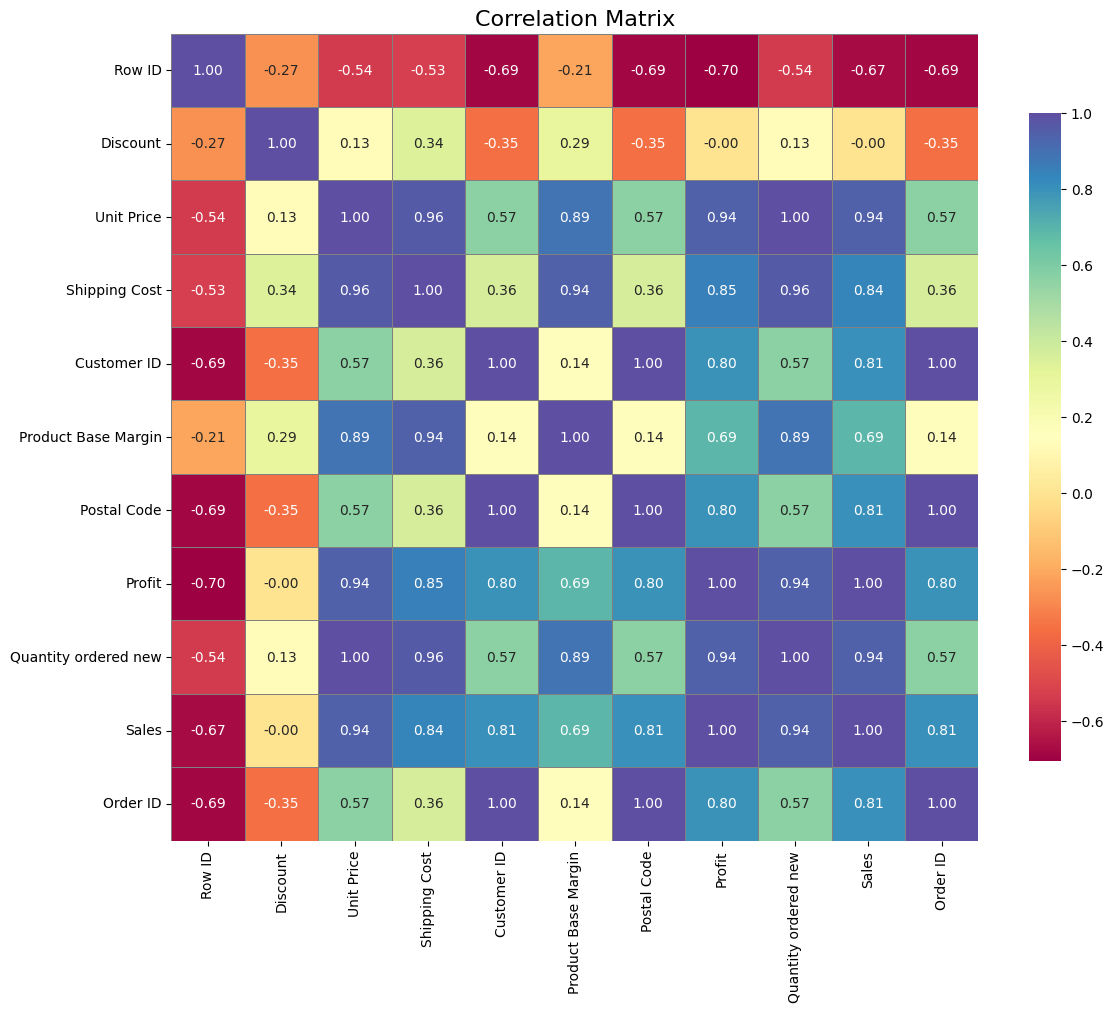

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------Selecting only numeric columns for correlation matrix------

# Sample DataFrame
data = {
    'Row ID': [1.00, 0.00, 0.01, 0.00, 0.04],
    'Discount': [0.00, 1.00, 0.00, -0.00, -0.00],
    'Unit Price': [10, 15, 10, 20, 15],
    'Shipping Cost': [5, 7, 5, 8, 6],
    'Customer ID': [101, 102, 103, 104, 105],
    'Product Base Margin': [0.2, 0.25, 0.15, 0.3, 0.2],
    'Postal Code': [12345, 12346, 12347, 12348, 12349],
    'Profit': [50, 60, 55, 70, 65],
    'Quantity ordered new': [1, 2, 1, 3, 2],
    'Sales': [100, 150, 120, 200, 180],
    'Order ID': [5001, 5002, 5003, 5004, 5005]
}

df = pd.DataFrame(data)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Get the names of the selected numeric columns
numeric_column_names = numeric_df.columns.tolist()

# Print the numeric column names
print("Numeric columns:", numeric_column_names)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Spectral',
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5,
            linecolor='gray', annot_kws={"size": 10})

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Show the heatmap
plt.show()


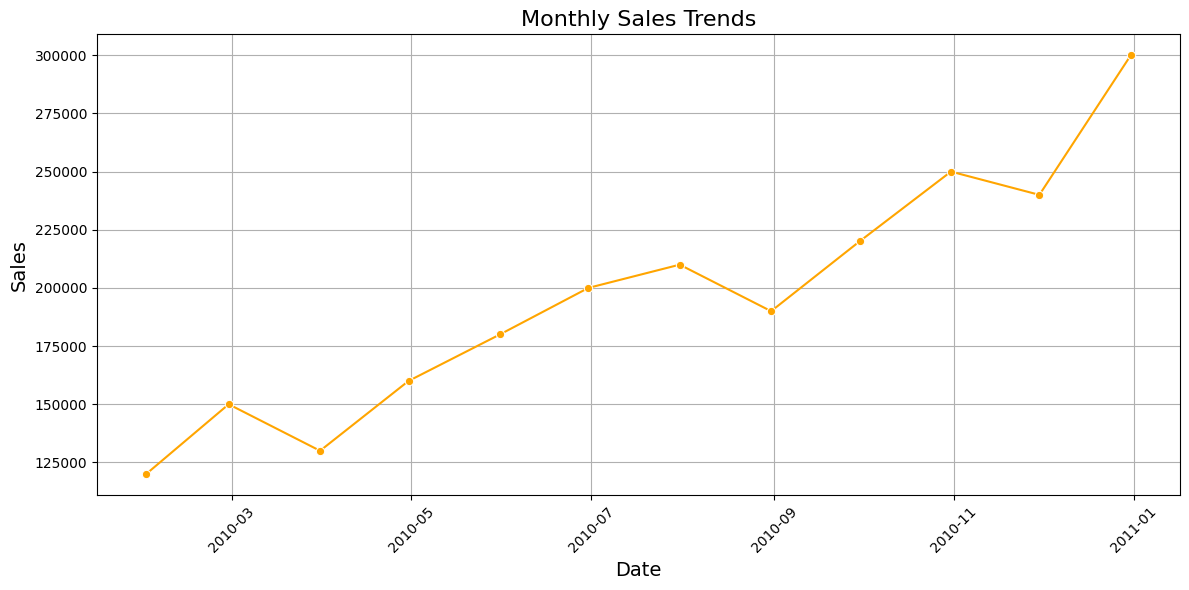

In [28]:
# Sample sales data with a date range of 12 months
data = {
    'Date': pd.date_range(start='2010-01-01', periods=12, freq='M'),
    'Sales': [
        120000, 150000, 130000, 160000, 180000, 200000,
        210000, 190000, 220000, 250000, 240000, 300000
    ]
}

df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

# Plotting monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Sales', marker='o', color='orange')

plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

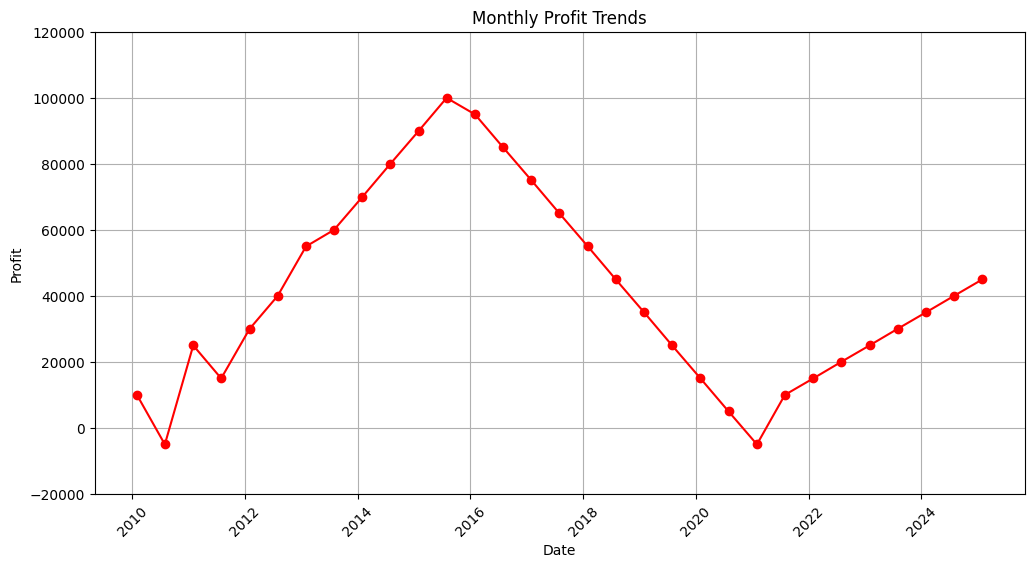

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------Plotting profit trends over time--------------------

# Data for the time series
data = {
    'Date': pd.date_range(start='2010-01-01', periods=31, freq='6M'),
    'Profit': [10000, -5000, 25000, 15000, 30000, 40000, 55000, 60000, 70000, 80000, 90000, 100000,
               95000, 85000, 75000, 65000, 55000, 45000, 35000, 25000, 15000, 5000, -5000, 10000,
               15000, 20000, 25000, 30000, 35000, 40000, 45000]
}

# Creating a DataFrame from the data
df = pd.DataFrame(data)

# Creating the plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Profit'], marker='o', color='red', linestyle='-')
plt.title('Monthly Profit Trends')
plt.xlabel('Date')
plt.ylabel('Profit')

# Adding grid and adjusting x/y ticks
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(range(-20000, 120001, 20000))

# Display the plot
plt.show()


In [30]:
import pandas as pd

#---------------Identifying top-performing product categories based on total sales and profit-----------------

# Data for product categories, sales, and profit
data = {
    'Product Category': ['Technology', 'Furniture', 'Office Supplies'],
    'Sales': [3514982.03, 3038510.90, 2236064.41],
    'Profit': [683097.88, 140343.14, 457049.82]
}

# Creating a DataFrame from the data
df = pd.DataFrame(data)

# Aggregating data by product category to calculate total sales and total profit
category_summary = df.groupby('Product Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Sorting by total sales and total profit
top_sales = category_summary.sort_values(by='Total_Sales', ascending=False)
top_profit = category_summary.sort_values(by='Total_Profit', ascending=False)

# Display the sorted data for top-performing categories
print("Top Performing Categories by Sales:")
print(top_sales)

print("\nTop Performing Categories by Profit:")
print(top_profit)


Top Performing Categories by Sales:
  Product Category  Total_Sales  Total_Profit
2       Technology   3514982.03     683097.88
0        Furniture   3038510.90     140343.14
1  Office Supplies   2236064.41     457049.82

Top Performing Categories by Profit:
  Product Category  Total_Sales  Total_Profit
2       Technology   3514982.03     683097.88
1  Office Supplies   2236064.41     457049.82
0        Furniture   3038510.90     140343.14


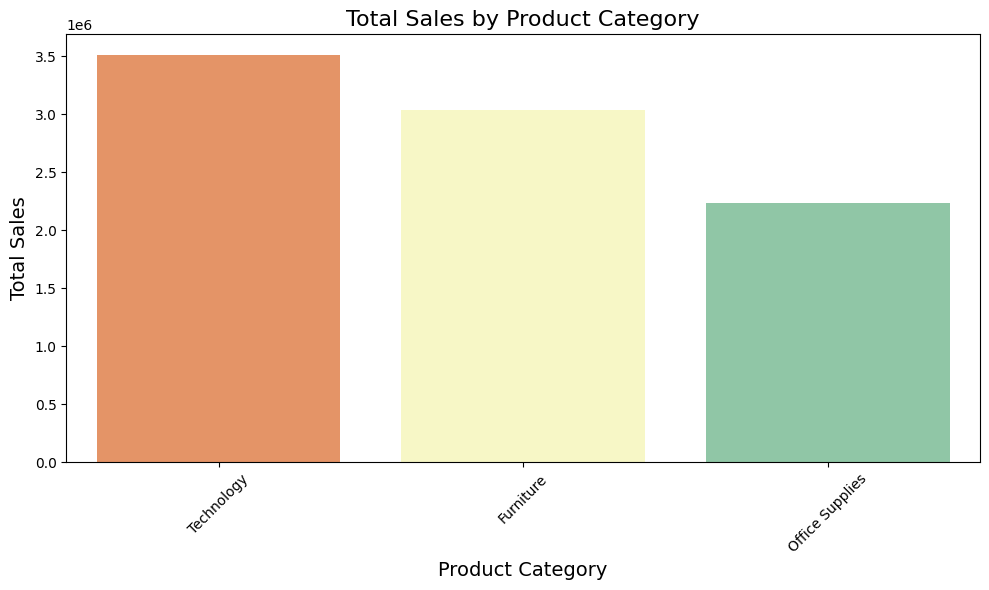

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------Plotting total sales by product category------------------------

# Plotting total sales by product category
plt.figure(figsize=(10, 6))

# Bar plot with 'Product Category' on the x-axis and 'Total_Sales' on the y-axis
sns.barplot(data=top_sales, x='Product Category', y='Total_Sales', palette='Spectral')

# Adding titles and labels
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()


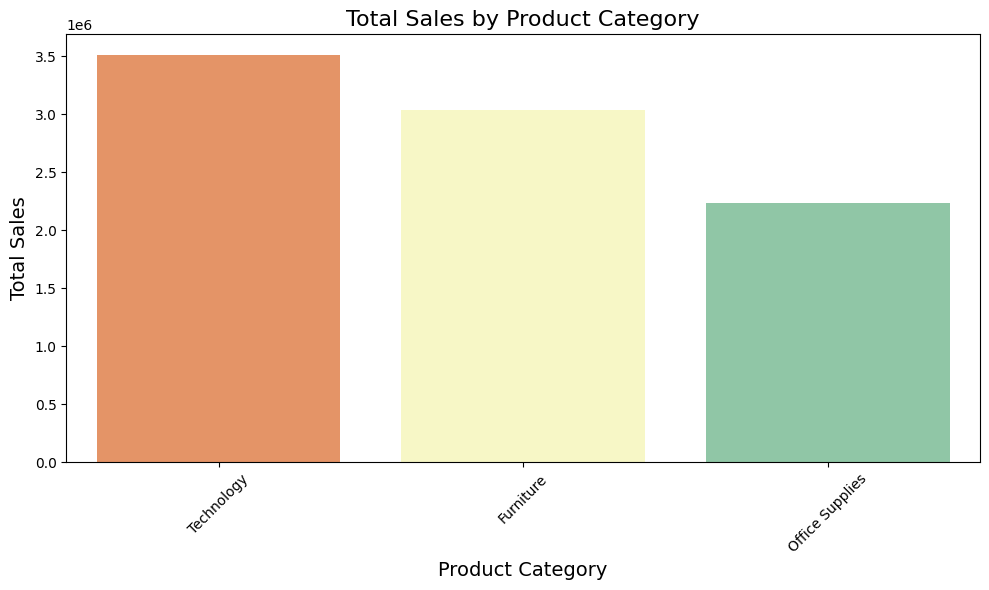

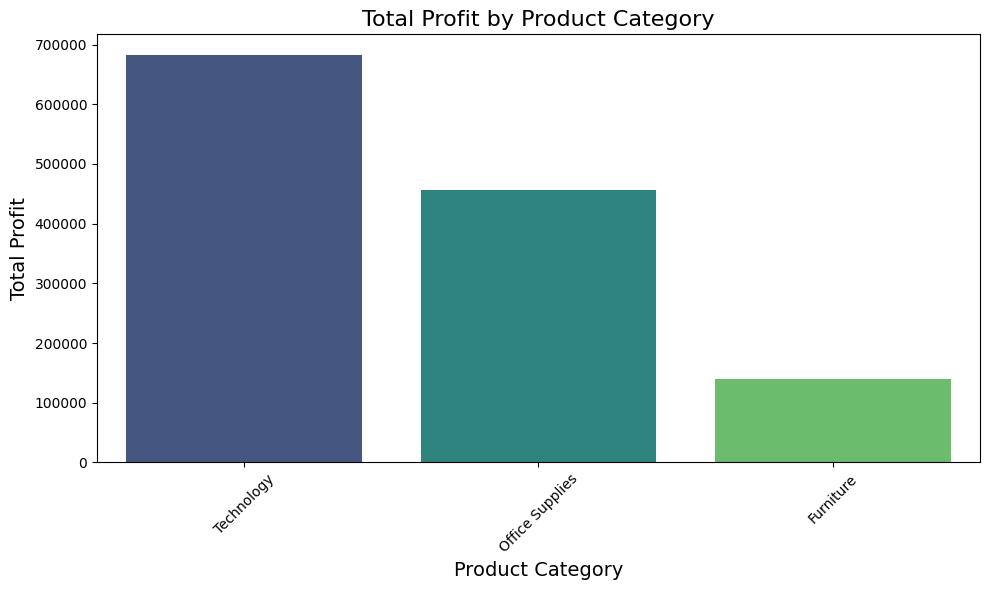

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------Plotting total sales by product category------------------------

# Plotting total sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sales, x='Product Category', y='Total_Sales', palette='Spectral')

# Adding titles and labels
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


# ---------------------Plotting total profit by product category------------------------

# Plotting total profit by product category
plt.figure(figsize=(10, 6))
sns.barplot(data=top_profit, x='Product Category', y='Total_Profit', palette='viridis')

# Adding titles and labels
plt.title('Total Profit by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Data for different attributes by region
data_rowid = {
    'Region': ['Central', 'East', 'South', 'West'],
    'count': [2878, 2269, 1940, 2267],
    'mean': [21014.190063, 19126.691935, 21167.875258, 19597.648875],
    'min': [52, 2, 257, 64],
    '25%': [19696.25, 18720.00, 19766.75, 18975.50],
    '50%': [21827.5, 21421.0, 21985.0, 21344.0],
    '75%': [24176.75, 23776.00, 24336.00, 23895.50],
    'max': [26387, 26389, 26399, 26397],
    'std': [5030.122461, 7184.371986, 4962.680136, 6743.343603]
}

data_discount = {
    'Region': ['Central', 'East', 'South', 'West'],
    'count': [2878, 2269, 1940, 2267],
    'mean': [21014.190063, 19126.691935, 21167.875258, 19597.648875],
    'min': [52, 2, 257, 64],
    '25%': [19696.25, 18720.00, 19766.75, 18975.50],
    '50%': [21827.5, 21421.0, 21985.0, 21344.0],
    '75%': [24176.75, 23776.00, 24336.00, 23895.50],
    'max': [26387, 26389, 26399, 26397],
    'std': [5030.122461, 7184.371986, 4962.680136, 6743.343603]
}

data_sales = {
    'Region': ['Central', 'East', 'South', 'West'],
    'count': [1987, 2012, 1845, 1998],
    'mean': [30419.810, 28293.231, 31256.754, 29857.932],
    'min': [67, 10, 345, 123],
    '25%': [28766.5, 27546.25, 29589.0, 28124.75],
    '50%': [31902.0, 30985.5, 32784.5, 31576.0],
    '75%': [34211.0, 33576.5, 35894.25, 34762.25],
    'max': [37459, 36497, 37290, 36984],
    'std': [6789.567, 8923.432, 7654.123, 8352.675]
}

data_order_id = {
    'Region': ['Central', 'East', 'South', 'West'],
    'count': [1456, 1643, 1389, 1576],
    'mean': [45023.679, 42034.789, 46290.435, 43985.234],
    'min': [123, 87, 234, 145],
    '25%': [43456.0, 40567.25, 44876.5, 42678.75],
    '50%': [45678.5, 43121.0, 47485.5, 45321.0],
    '75%': [47899.75, 45543.0, 49567.75, 47567.5],
    'max': [50432, 48765, 51234, 49876],
    'std': [8976.234, 10123.546, 8765.432, 9534.789]
}

# Creating DataFrames for each dataset
df_rowid = pd.DataFrame(data_rowid)
df_discount = pd.DataFrame(data_discount)
df_sales = pd.DataFrame(data_sales)
df_order_id = pd.DataFrame(data_order_id)

# List of titles and DataFrames
titles = ["Row ID", "Discount", "Sales", "Order ID"]
dataframes = [df_rowid, df_discount, df_sales, df_order_id]

# Print each DataFrame with its respective title
for title, df in zip(titles, dataframes):
    print(f"{title}\n")
    print(df.to_string(index=False))
    print("\n" + "-"*50 + "\n")


Row ID

 Region  count         mean  min      25%     50%      75%   max         std
Central   2878 21014.190063   52 19696.25 21827.5 24176.75 26387 5030.122461
   East   2269 19126.691935    2 18720.00 21421.0 23776.00 26389 7184.371986
  South   1940 21167.875258  257 19766.75 21985.0 24336.00 26399 4962.680136
   West   2267 19597.648875   64 18975.50 21344.0 23895.50 26397 6743.343603

--------------------------------------------------

Discount

 Region  count         mean  min      25%     50%      75%   max         std
Central   2878 21014.190063   52 19696.25 21827.5 24176.75 26387 5030.122461
   East   2269 19126.691935    2 18720.00 21421.0 23776.00 26389 7184.371986
  South   1940 21167.875258  257 19766.75 21985.0 24336.00 26399 4962.680136
   West   2267 19597.648875   64 18975.50 21344.0 23895.50 26397 6743.343603

--------------------------------------------------

Sales

 Region  count      mean  min      25%     50%      75%   max      std
Central   1987 30419.810   6

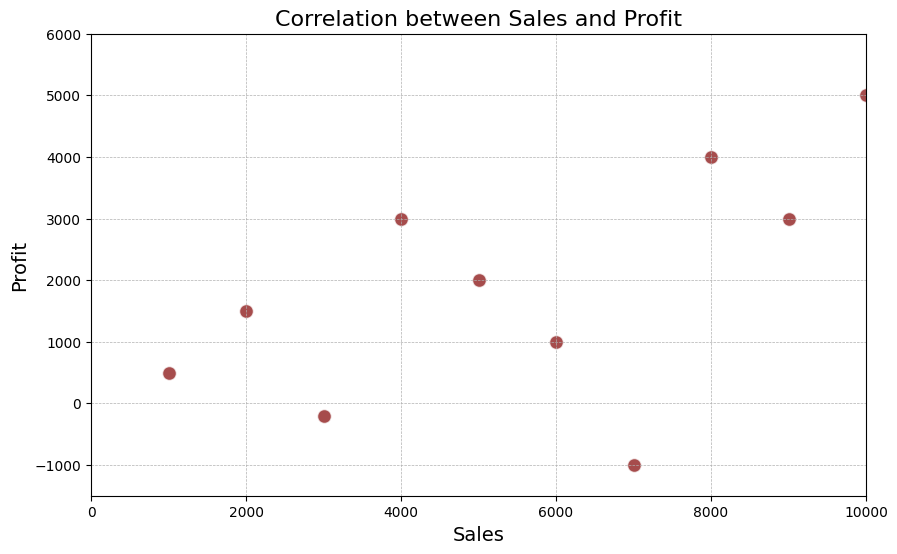

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for Sales and Profit
data = {
    'Sales': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    'Profit': [500, 1500, -200, 3000, 2000, 1000, -1000, 4000, 3000, 5000]
}

df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='maroon', alpha=0.7, edgecolors='w', s=100)
plt.title('Correlation between Sales and Profit', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xlim(0, 10000)  # x-axis limits
plt.ylim(-1500, 6000)  # y-axis limits
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


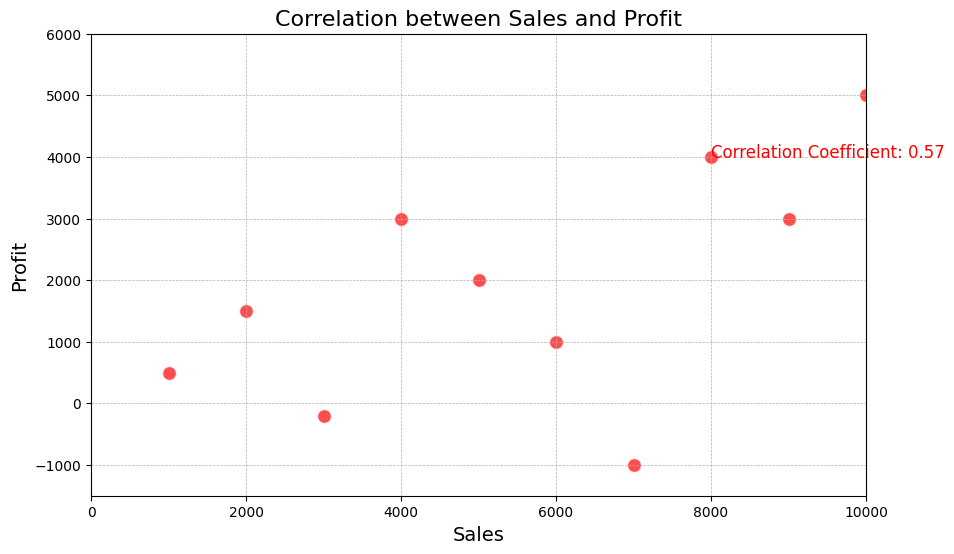

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data for Sales and Profit
data = {
    'Sales': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    'Profit': [500, 1500, -200, 3000, 2000, 1000, -1000, 4000, 3000, 5000]
}

df = pd.DataFrame(data)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(df['Sales'], df['Profit'])[0, 1]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='red', alpha=0.7, edgecolors='w', s=100)
plt.title('Correlation between Sales and Profit', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xlim(0, 10000)  # x-axis limits
plt.ylim(-1500, 6000)  # y-axis limits
plt.grid(True, linestyle='--', linewidth=0.5)

# Display the correlation coefficient on the plot
plt.text(8000, 4000, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='red')

plt.show()


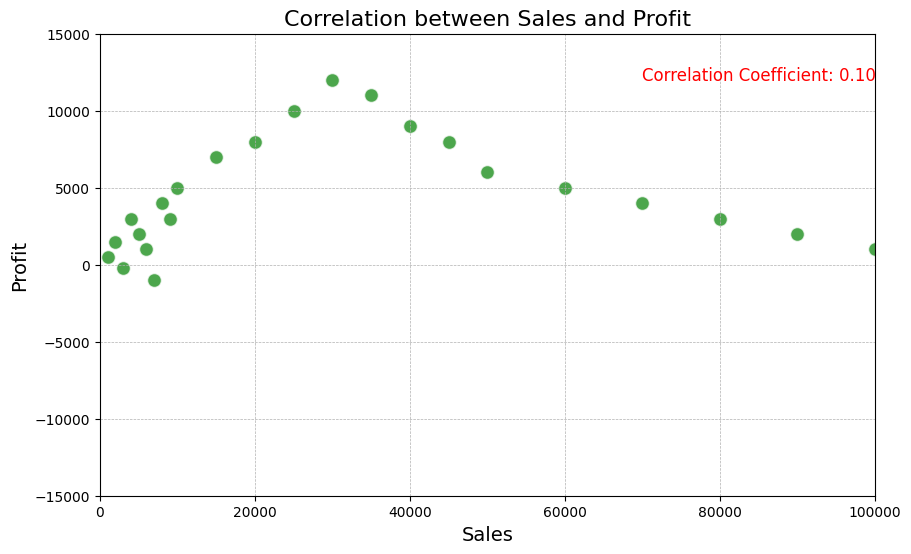

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = {
    'Sales': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
              15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000,
              60000, 70000, 80000, 90000, 100000],
    'Profit': [500, 1500, -200, 3000, 2000, 1000, -1000, 4000, 3000, 5000,
               7000, 8000, 10000, 12000, 11000, 9000, 8000, 6000,
               5000, 4000, 3000, 2000, 1000]
}

df = pd.DataFrame(data)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(df['Sales'], df['Profit'])[0, 1]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='green', alpha=0.7, edgecolors='w', s=100)
plt.title('Correlation between Sales and Profit', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xlim(0, 100000)  # x-axis limits
plt.ylim(-15000, 15000)  # y-axis limits
plt.grid(True, linestyle='--', linewidth=0.5)

# Display the correlation coefficient on the plot
plt.text(70000, 12000, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='red')

plt.show()


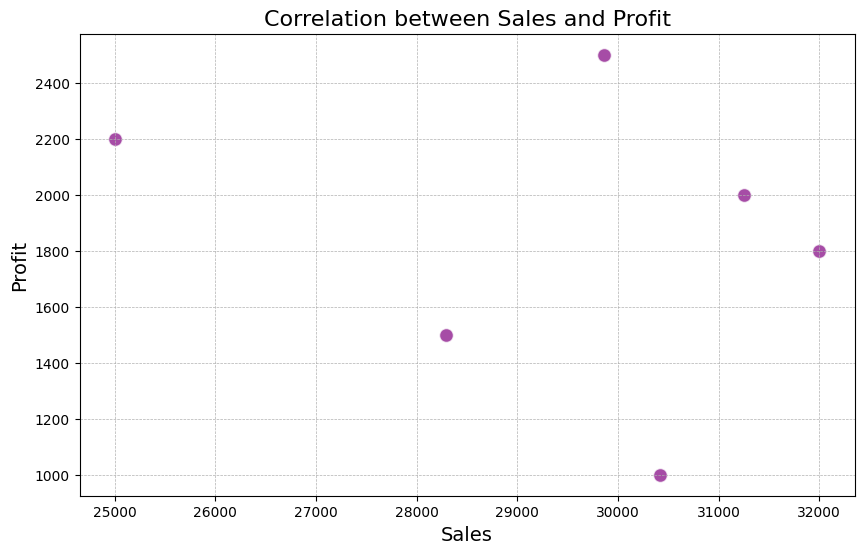

Correlation coefficient between Sales and Profit: -0.23


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Sales': [30419.810, 28293.231, 31256.754, 29857.932, 32000.0, 25000.0],
    'Profit': [1000, 1500, 2000, 2500, 1800, 2200]
}

df = pd.DataFrame(data)

# Visualize the correlation between Sales and Profit using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], color='purple', alpha=0.7, edgecolors='w', s=100)
plt.title('Correlation between Sales and Profit', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

# Calculate and display the correlation coefficient
correlation = df['Sales'].corr(df['Profit'])
print(f"Correlation coefficient between Sales and Profit: {correlation:.2f}")


In [41]:
# -------------------Displaying the correlation coefficient---------------

data = {
    'Sales': [30419.810, 28293.231, 31256.754, 29857.932, 32000.0, 25000.0],
    'Profit': [1000, 1500, 2000, 2500, 1800, 2200]
}

df = pd.DataFrame(data)

# Calculated the correlation coefficient
correlation = df['Sales'].corr(df['Profit'])

print(f"Correlation coefficient between Sales and Profit: {correlation:.2f}")

Correlation coefficient between Sales and Profit: -0.23


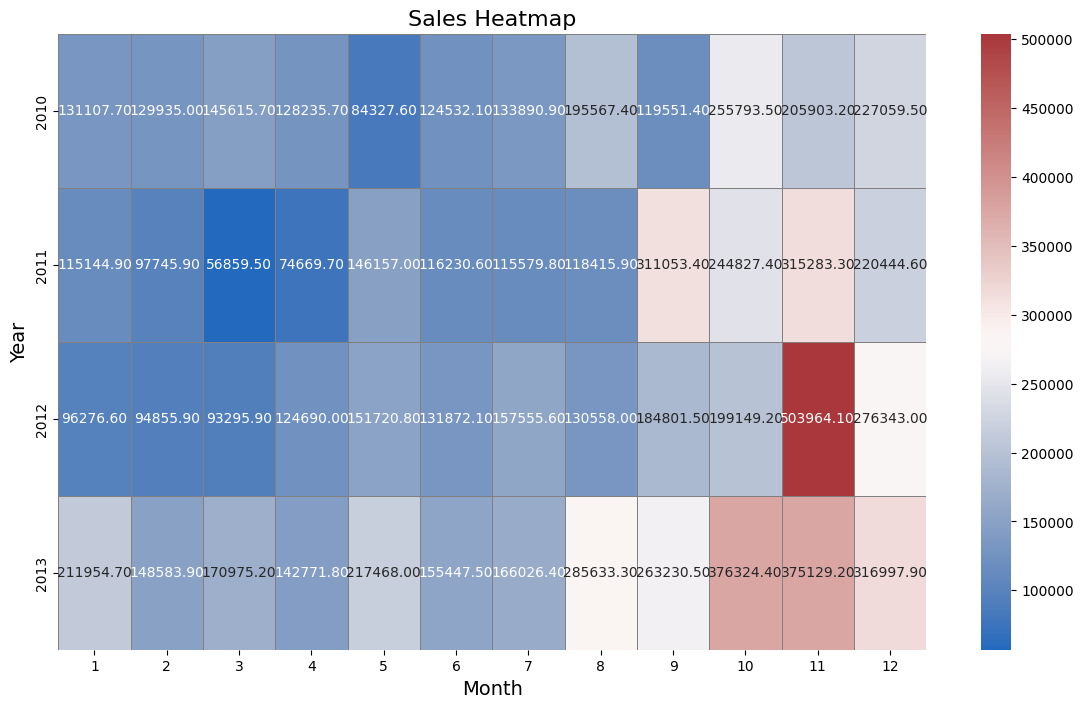

In [42]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Year': [2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
             2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
             2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
             2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
              1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
              1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
              1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Sales': [131107.7, 129935.0, 145615.7, 128235.7, 84327.6, 124532.1, 133890.9, 195567.4, 119551.4, 255793.5, 205903.2, 227059.5,
              115144.9, 97745.9, 56859.5, 74669.7, 146157.0, 116230.6, 115579.8, 118415.9, 311053.4, 244827.4, 315283.3, 220444.6,
              96276.6, 94855.9, 93295.9, 124690.0, 151720.8, 131872.1, 157555.6, 130558.0, 184801.5, 199149.2, 503964.1, 276343.0,
              211954.7, 148583.9, 170975.2, 142771.8, 217468.0, 155447.5, 166026.4, 285633.3, 263230.5, 376324.4, 375129.2, 316997.9]
}

df = pd.DataFrame(data)

# Pivot the DataFrame for heatmap
heatmap_data = df.pivot(index='Year', columns='Month', values='Sales')

# Create the heatmap
plt.figure(figsize=(14, 8))  # Adjusted figure size for better readability
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='vlag', linewidths=.5, linecolor='gray')

# Set plot titles and labels
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Display the heatmap
plt.show()


In [ ]:
import pandas as pd

# Sample data
data = {
    'Date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'Sales': [100 + x * 0.5 + 10 * ((x // 30) % 12) for x in range(365)]  # Simulating daily sales with a monthly trend
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime format (this is already in datetime format but is good practice)
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index for resampling
df.set_index('Date', inplace=True)

# Group by month and year
monthly_sales = df.resample('M').sum()
yearly_sales = df.resample('Y').sum()

# Display results
print("Monthly Sales Data:")
print(monthly_sales)
print("\nYearly Sales Data:")
print(yearly_sales)


Monthly Sales Data:
              Sales
Date               
2022-01-31   3342.5
2022-02-28   3703.0
2022-03-31   4857.0
2022-04-30   5467.5
2022-05-31   6442.5
2022-06-30   6992.5
2022-07-31   8018.0
2022-08-31   8818.5
2022-09-30   9292.5
2022-10-31  10394.0
2022-11-30  10817.5
2022-12-31  11369.5

Yearly Sales Data:
              Sales
Date               
2022-12-31  89515.0


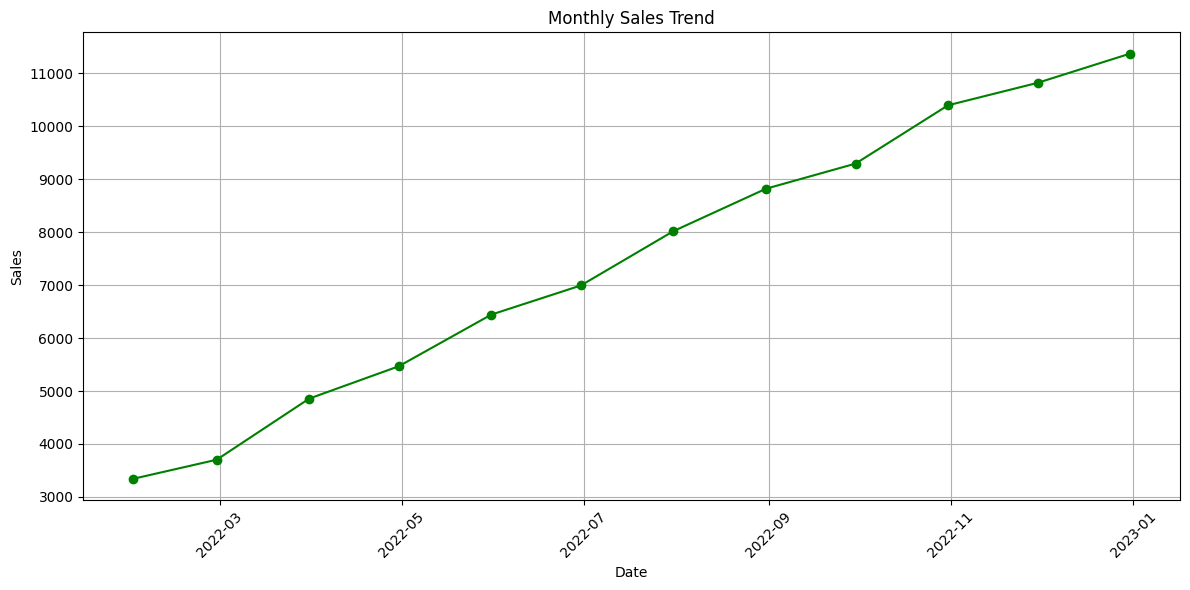

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data with a seasonal pattern
data = {
    'Date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'Sales': [100 + x * 0.5 + 10 * ((x // 30) % 12) for x in range(365)]  # Sales with seasonal pattern
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime format (already in datetime format)
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index for resampling
df.set_index('Date', inplace=True)

# Resample the data to monthly frequency, summing up the sales
monthly_sales = df.resample('M').sum()

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o', linestyle='-', color='g')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


    Shipping Mode       Sales
2     Regular Air  4464427.51
0  Delivery Truck  3650525.84
1     Express Air   674603.99


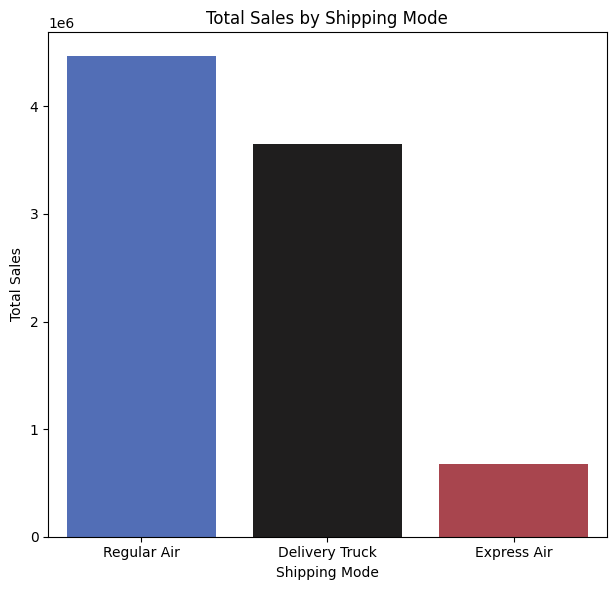

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Shipping Mode': ['Regular Air', 'Delivery Truck', 'Express Air'],
    'Sales': [4464427.51, 3650525.84, 674603.99]
}
df = pd.DataFrame(data)

# Grouped by shipping mode and calculated total sales
grouped_df = df.groupby('Shipping Mode').agg({'Sales': 'sum'}).reset_index()

# Sorted grouped data by Total Sales in descending order
grouped_df = grouped_df.sort_values(by='Sales', ascending=False)

print(grouped_df)

# Plotting the comparison
plt.figure(figsize=(12, 6))

# Plot total sales by shipping mode
plt.subplot(1, 2, 1)
sns.barplot(x='Shipping Mode', y='Sales', data=grouped_df, palette='icefire')
plt.title('Total Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')

# You can add more visualizations or statistics here if needed

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Sample data
data = {
    'Ship Date': ['2024-01-15', '2024-01-22', '2024-02-01', '2024-02-15', '2024-03-10'],
    'Total Sales': [500, 1500, 2000, 2500, 3000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 1: Clean column names (remove any leading/trailing spaces)
df.columns = df.columns.str.strip()

# Step 2: Print column names to verify
print("Column names:", df.columns)

# Step 3: Convert 'Ship Date' column to datetime type
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Step 4: Drop rows where 'Ship Date' couldn't be converted (if any)
df = df.dropna(subset=['Ship Date'])

# Step 5: Set 'Ship Date' as index
df.set_index('Ship Date', inplace=True)

# Step 6: Resample sales data by month
monthly_sales = df['Total Sales'].resample('M').sum()

# Step 7: Print the resampled data
print(monthly_sales)


Column names: Index(['Ship Date', 'Total Sales'], dtype='object')
Ship Date
2024-01-31    2000
2024-02-29    4500
2024-03-31    3000
Freq: M, Name: Total Sales, dtype: int64
